# 1 - Importation des biblioteques

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
print("Voici les bibliotheques installées:")
print("La version du Python est :", os.sys.version)
print("La version de Pandas est :",pd.__version__)
print("La version de Numpy est :",np.__version__)
print("La version de Matplotlib est :", plt.matplotlib.__version__)
print("La version de seaborn est :", sns.__version__)

Voici les bibliotheques installées:
La version du Python est : 3.10.16 (main, Dec 11 2024, 16:24:50) [GCC 11.2.0]
La version de Pandas est : 2.2.3
La version de Numpy est : 2.2.3
La version de Matplotlib est : 3.10.1
La version de seaborn est : 0.13.2


# 2 - Chargements des données

In [8]:
print(os.getcwd())

/home/saikou/Projet/Projet_Spotify/notebooks


In [9]:
df_artists=pd.read_csv("../data/artists.csv",encoding="utf-8")

In [10]:
df_track=pd.read_csv("../data/tracks.csv", encoding="utf-8")

In [11]:
df_top200=pd.read_csv("../data/spotify_top200_global.csv",encoding="utf-8")

# 3 - Exploration rapide des données

In [12]:
def explore(df,name):
    # Pour desactiver la notation decimale
    pd.options.display.float_format='{:,.2f}'.format
    print(f"Aperçu de la table {name} :")
    # Les 5 premieres lignes

    display(df.head())
    
     # Les types de données
    print("Des infos sur les colonnes :")
    print(df.info())
    
    # Les valeurs manquantes
    print("Valeurs manquantes par colonne :")
    print(df.isna().sum())
    
    # Des statistiques pour les colonnes numériques
    print("Les statistiques générales")
    display(df.describe()) 
    
    # Les valeurs uniques
    print("Les valeurs uniques ")
    print(df.nunique())

In [13]:
explore(df_artists, "artiste")

Aperçu de la table artiste :


,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.00,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.00,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.00,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.00,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.00,[],Ioannis Panoutsopoulos,0


Des infos sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162095 entries, 0 to 1162094
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1162095 non-null  object 
 1   followers   1162084 non-null  float64
 2   genres      1162095 non-null  object 
 3   name        1162092 non-null  object 
 4   popularity  1162095 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 44.3+ MB
None
Valeurs manquantes par colonne :
id             0
followers     11
genres         0
name           3
popularity     0
dtype: int64
Les statistiques générales


,followers,popularity
count,"1,162,084.00","1,162,095.00"
mean,"10,220.70",8.80
std,"254,399.49",13.56
min,0.00,0.00
25%,10.00,0.00
50%,57.00,2.00
75%,417.00,13.00
max,"78,900,234.00",100.00


Les valeurs uniques 
id            1162095
followers       51998
genres          49155
name          1134429
popularity         99
dtype: int64


- Dans notre dataset nous avons :
    
    - variables discretes : genres, name , popularity.
    - variables continues : followers.

- Dans notre dataset nous avons:
    
    - 1 1162 095 lignes et 5 colonnes, nous observons deux colonnes qui ont des valeurs manquantes (followers(11), name(3)).
    - En moyenne nous avons 10 220 followers pour un artiste mais nous observons un ecart-type qui est de 254 399 representant 2489%, cela nous indique une énorme dispersion on a donc des artistes qui influence fortement sur la moyenne.

    - La mediane est de 57 cela nous indique que 50% des artistes ont moins de 57 followers ainsi on observe que la plupart des artistes ne sont pas suivis, 75% des artistes ont moins de 417 followers, cela nous indique que seuls 25% des artistes commencent à avoir une base de fans plus significative.

    - Au niveau de la popularité, nous avons une  moyenne de 8,8 sur 100 ce qui est trés faible, l'ecart-type est de 13,56%, nous avons donc une forte dispersion car elle represente 154% de la moyenne, mais cette dispersion est moins extrême que pour les followers.

    - La majorité des artistes ne sont pas trés ecoutés car on observe que 50% des artistes ont une popularité de 2 ou moins.

    - Nous observons dans ce jeu de donnée une structure trés inégalitaire du marché de la musique qui se confirme dans la réalité, nous avons un petit nombre d'artistes qui dominent le marché.






In [14]:
explore(df_track,"df_track")

Aperçu de la table df_track :


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.65,0.45,0,-13.34,1,0.45,0.67,0.74,0.15,0.13,104.85,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.69,0.26,0,-22.14,1,0.96,0.80,0.00,0.15,0.66,102.01,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.43,0.18,1,-21.18,1,0.05,0.99,0.02,0.21,0.46,130.42,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.32,0.09,7,-27.96,1,0.05,0.99,0.92,0.10,0.40,169.98,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.40,0.16,3,-16.90,0,0.04,0.99,0.13,0.31,0.20,103.22,4


Des infos sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  floa

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,"586,672.00","586,672.00","586,672.00","586,672.00","586,672.00","586,672.00","586,672.00","586,672.00","586,672.00","586,672.00","586,672.00","586,672.00","586,672.00","586,672.00","586,672.00"
mean,27.57,"230,051.17",0.04,0.56,0.54,5.22,-10.21,0.66,0.10,0.45,0.11,0.21,0.55,118.46,3.87
std,18.37,"126,526.09",0.21,0.17,0.25,3.52,5.09,0.47,0.18,0.35,0.27,0.18,0.26,29.76,0.47
min,0.00,"3,344.00",0.00,0.00,0.00,0.00,-60.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,13.00,"175,093.00",0.00,0.45,0.34,2.00,-12.89,0.00,0.03,0.10,0.00,0.10,0.35,95.60,4.00
50%,27.00,"214,893.00",0.00,0.58,0.55,5.00,-9.24,1.00,0.04,0.42,0.00,0.14,0.56,117.38,4.00
75%,41.00,"263,867.00",0.00,0.69,0.75,8.00,-6.48,1.00,0.08,0.79,0.01,0.28,0.77,136.32,4.00
max,100.00,"5,621,218.00",1.00,0.99,1.00,11.00,5.38,1.00,0.97,1.00,1.00,1.00,1.00,246.38,5.00


Les valeurs uniques 
id                  586672
name                446474
popularity             101
duration_ms         123122
explicit                 2
artists             114030
id_artists          115062
release_date         19700
danceability          1285
energy                2571
key                     12
loudness             29196
mode                     2
speechiness           1655
acousticness          5217
instrumentalness      5402
liveness              1782
valence               1805
tempo               122706
time_signature           5
dtype: int64


- Dans notre dataset nous avons:

    - Nous avons 586672 observations et 20 variables
    - Variables discretes : explicit, mode, key, time_signature, popularity
    - Variables continues : duration_ms, loudness, tempo, danceability, energy, speechiness, acousticness, instrumentalness, liveness, valence.

- Dans notre dataset nous avons:
    
    - La moyenne de la popularité est assez faible (27.57), ce qui indique que la majorité des morceaux ont une popularité plutot faible.
    - En regardant les autres statistiques nous observons que la distribution est fortement asymertique à droite, nous avons des musoques ultra populaire ce qui tirent la moyenne vers le haut.
    
    - La durée des moyenne d'une morceau est de 3mn 50 sec, le maximum est de 93 cela est trop élevé il doit s'agir d'un mixes.
    

In [15]:
explore(df_top200, "Top 200")

Aperçu de la table Top 200 :


,Artist,Country,Date,Rank,Streams,Title
0,Tones And I,Global,2020-01-01,1,6155025,Dance Monkey
1,Arizona Zervas,Global,2020-01-01,2,4133489,ROXANNE
2,"KAROL G, Nicki Minaj",Global,2020-01-01,3,4017964,Tusa
3,Post Malone,Global,2020-01-01,4,3283180,Circles
4,Maroon 5,Global,2020-01-01,5,3127585,Memories


Des infos sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73200 entries, 0 to 73199
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Artist   73200 non-null  object
 1   Country  73200 non-null  object
 2   Date     73200 non-null  object
 3   Rank     73200 non-null  int64 
 4   Streams  73200 non-null  int64 
 5   Title    73200 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.4+ MB
None
Valeurs manquantes par colonne :
Artist     0
Country    0
Date       0
Rank       0
Streams    0
Title      0
dtype: int64
Les statistiques générales


,Rank,Streams
count,"73,200.00","73,200.00"
mean,100.50,"1,300,490.88"
std,57.73,"890,065.10"
min,1.00,"557,839.00"
25%,50.75,"767,864.50"
50%,100.50,"975,504.50"
75%,150.25,"1,486,871.50"
max,200.00,"17,223,237.00"


Les valeurs uniques 
Artist       772
Country        1
Date         366
Rank         200
Streams    70918
Title       1775
dtype: int64


- Dans notre dataset nous avons :
    
    - 73200 observations et 6 colonnes, nous n'avons aucune valeur manquante.
    - Nous avons 772 artistes distinct dans le classement.
    - Nous avons 1 775 chansons différentes qui apparaissent dans le top 200.
    
    - Nous avons 1,3 million de streams en moyenne avec une grande dispersion (68% de la moyenne).
    - Nous voyons que la moitié des chanson font moins d'un million de streams par jour, le record de stream journalier est de 17,2 millions par jour ce qui est trés élevé.

# 4 - Transformations des données

In [16]:
# Renomme la colonne pour une coherence
df_artists=df_artists.rename(columns={'name':'artists'})

# Conversion en minuscule de tous les artistes
df_artists["artists"]=df_artists["artists"].str.lower()

# Suppressons des crochets et des apostroches
df_artists=df_artists.replace(to_replace=r'\[|\]', value='', regex=True)
df_artists=df_artists.replace(to_replace="'", value='', regex=True)

# On remplace les valeurs manquantes
df_artists=df_artists.replace(to_replace="", value='Aucun', regex=True)

In [17]:
# Supprimer crochets et des apostrophes
df_track=df_track.replace(to_replace=r'\[|\]', value='', regex=True)  
df_track=df_track.replace(to_replace="'", value='', regex=True)

# Identification de la longuer des dates
df_track["release_date_length"]=df_track["release_date"].astype(str).apply(len)

# Pour les dates qui n'ont que l'année on ajoute le jour et le mois
m_year=df_track["release_date_length"]==4
df_track.loc[m_year, "release_date"]=df_track.loc[m_year, "release_date"] + "-01-01"

# Pour les dates qui n'ont que l'année et le mois on ajopute le jour
m_year_month=df_track["release_date_length"]==7
df_track.loc[m_year_month, "release_date"]=df_track.loc[m_year_month, "release_date"] + "-01"

# Nous converstissons la colonne en datetime
df_track["release_date"]=pd.to_datetime(df_track["release_date"], format="%Y-%m-%d", errors="raise")

# Création d'une nouvelle colonne année
df_track["release_year"]=df_track["release_date"].dt.year


In [18]:
# Création d'un dataset qui est la somme des streams par artiste
sommestream=df_top200.groupby("Artist")["Streams"].sum().reset_index()


In [19]:
# Nombre de titres par artistes
singleparartiste=df_top200.groupby("Artist")["Title"].nunique().reset_index() 
singleparartiste.columns=["Artist", "Nombre de single dans le top200"] 

# 5 - Exploration visuelle

## 5-1 Exploration univariée

In [20]:
def plot_histo(df, column, title, bins=None, log_scale=False):
    
    fig, ax=plt.subplots(2, 1, figsize=(10, 7), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)
    
    sns.histplot(df[column], bins=bins, log_scale=log_scale, color="royalblue", alpha=0.7, ax=ax[0])
    ax[0].set_ylabel("Fréquence")
    ax[0].set_title(title, fontsize=12)
    sns.boxplot(x=df[column], color="royalblue", ax=ax[1])
    ax[1].set_title(f"Boxplot de {column}", fontsize=12)
    ax[1].set_xlabel(column)
    
    plt.show()
    

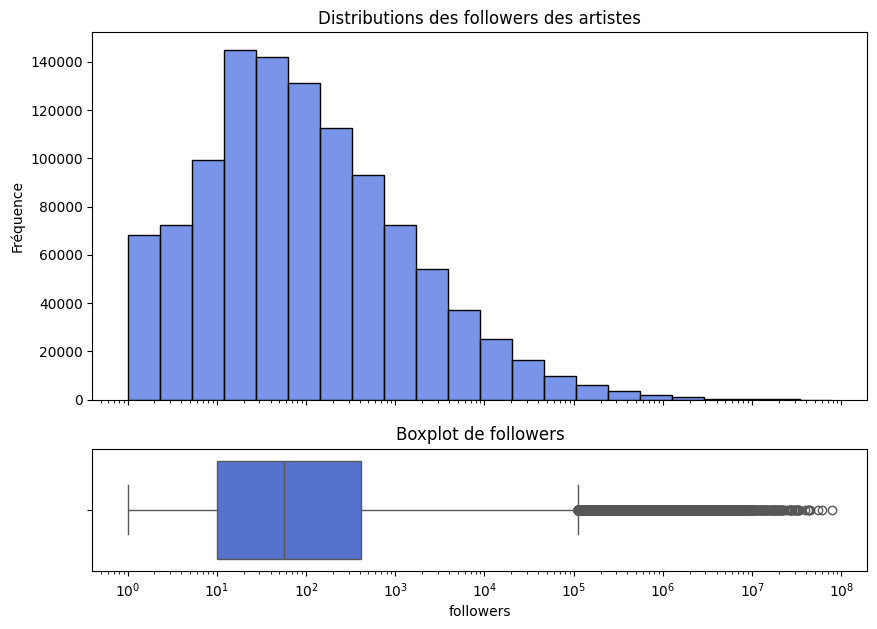

In [21]:
plot_histo(df_artists, "followers", "Distributions des followers des artistes",bins=22, log_scale=True)

- Nous avons la presence de nombreuses valeurs aberrantes au-demà de 100 000 followers, la majorité des artistes ont moins de 100 followers.

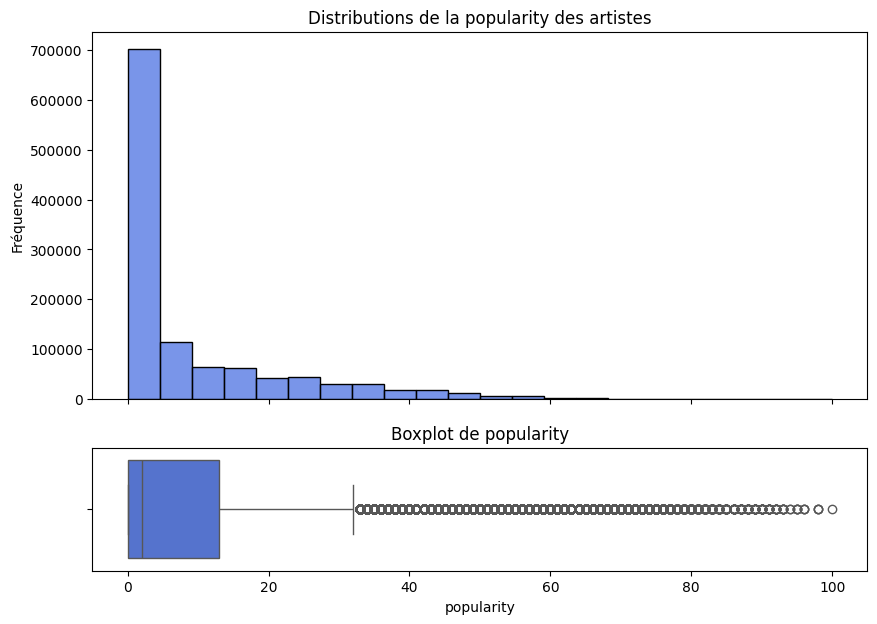

In [22]:
plot_histo(df_artists, "popularity", "Distributions de la popularity des artistes",bins=22, log_scale=False)

- Nous avons un petit groupe de superstars qui domine le marché, à partir de 40 nous avons des valeurs aberrantes, nous avons donc la majorité des artistes peine à capter une audience significative.

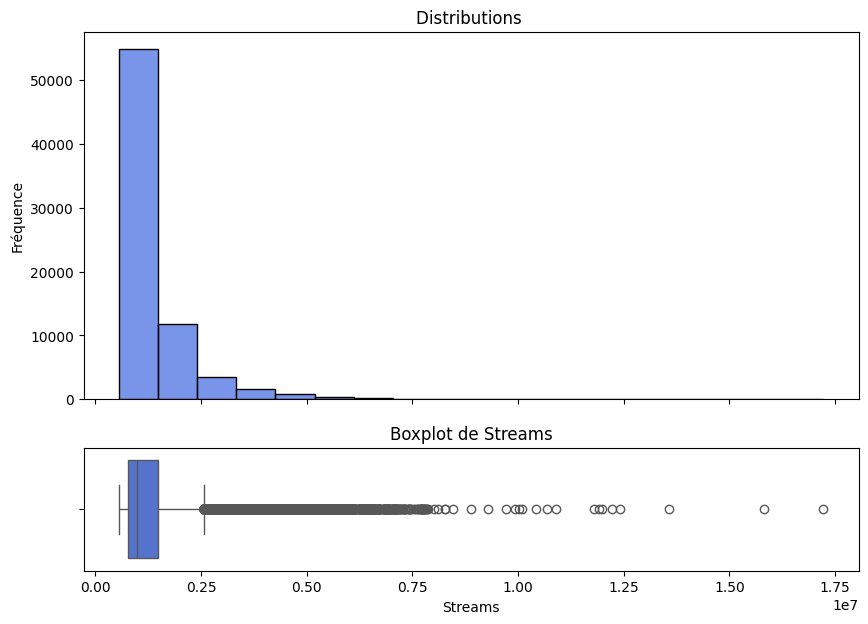

In [23]:
plot_histo(df_top200, "Streams", "Distributions ",bins=18, log_scale=False)

- Nous avons de nombreux morceaux dépassent les 5 millions de streams, avec des super-hits atteignant jusqu’à 17 millions en une journée.
- La majrotié des morceaux cumulent moins d'un million de streams.

/tmp/ipykernel_174560/4065687971.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_genre_m, x="popularity", y="genres", palette="viridis")


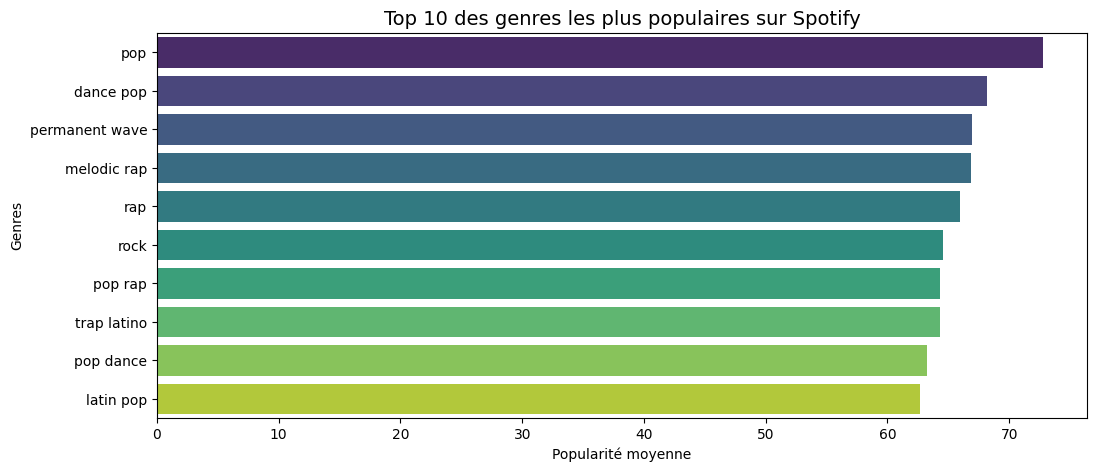

In [24]:
# Nous allons creer un nouveau dataset
# Division des genres 
df_genre=df_artists.copy()
df_genre["genres"]=df_genre["genres"].str.split(", ")
df_genre=df_genre.explode("genres")

# On groupby et on calcule la popularité moyenne
df_genre_m=df_genre.groupby("genres")["popularity"].mean().reset_index()

#  afficher les 10 genres les plus populaires

df_genre_m=df_genre_m.sort_values(by="popularity", ascending=False).head(10)

plt.figure(figsize=(12, 5))
sns.barplot(data=df_genre_m, x="popularity", y="genres", palette="viridis")
plt.title("Top 10 des genres les plus populaires sur Spotify", fontsize=14)
plt.xlabel("Popularité moyenne")
plt.ylabel("Genres")
plt.show()

- Nous observons que le genre pop domine largement, suivi du dance pop, nous avons aussi une forte presece du trap latino et latin pop qui montre une influence de la musique hispanophone.

/tmp/ipykernel_174560/894474816.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10["followers"], y=top_10["artists"], palette="viridis")


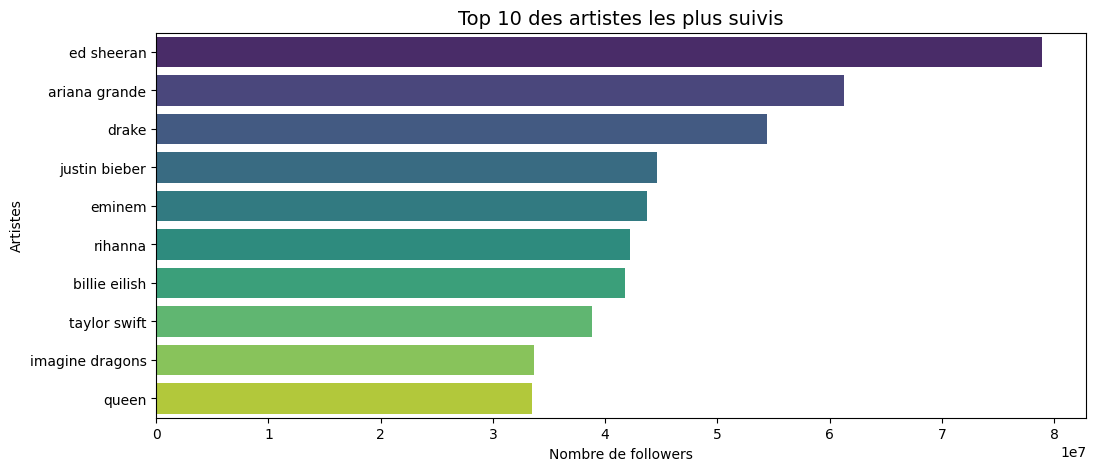

In [25]:
#Top 10 des artistes les plus suivis
top_10=df_artists.nlargest(10, "followers")
plt.figure(figsize=(12, 5))
sns.barplot(x=top_10["followers"], y=top_10["artists"], palette="viridis")
plt.title("Top 10 des artistes les plus suivis", fontsize=14)
plt.xlabel("Nombre de followers")
plt.ylabel("Artistes")
plt.show()

- Ed Sheeran, Ariana Grande et Drake dominent avec des dizaines de millions de followers.


/tmp/ipykernel_174560/1158497499.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette="magma")


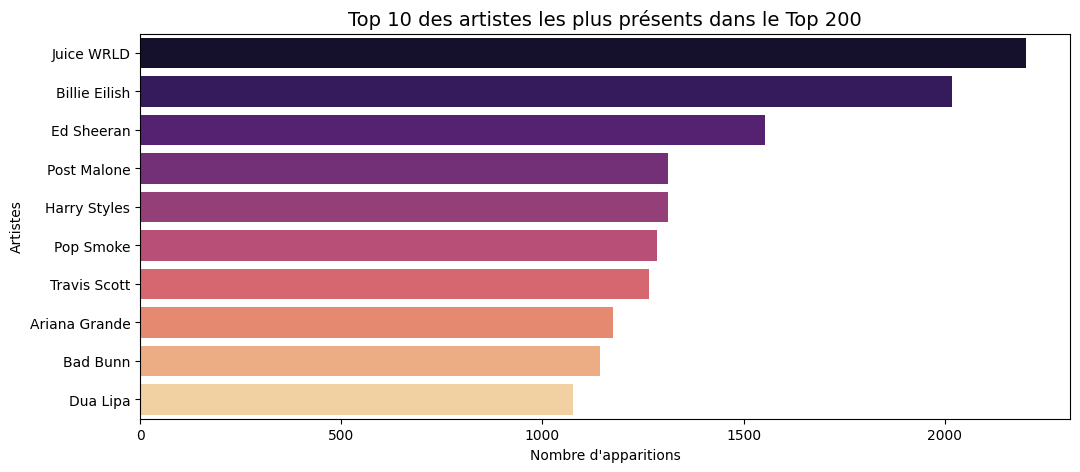

In [26]:
# Les artistes les plus presents dans le classement
top_artists=df_top200["Artist"].value_counts().head(10)
plt.figure(figsize=(12, 5))
sns.barplot(x=top_artists.values, y=top_artists.index, palette="magma")
plt.title("Top 10 des artistes les plus présents dans le Top 200", fontsize=14)
plt.xlabel("Nombre d'apparitions")
plt.ylabel("Artistes")
plt.show()

- Juice WRLD et Billie Eilish sont les artistes ayant le plus de morceaux dans le classement.
- Bad Bunny et Dua Lipa confirment de la pop féminine.

/tmp/ipykernel_174560/2572556423.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_popular["popularity"], y=top_popular["artists"], palette="viridis")


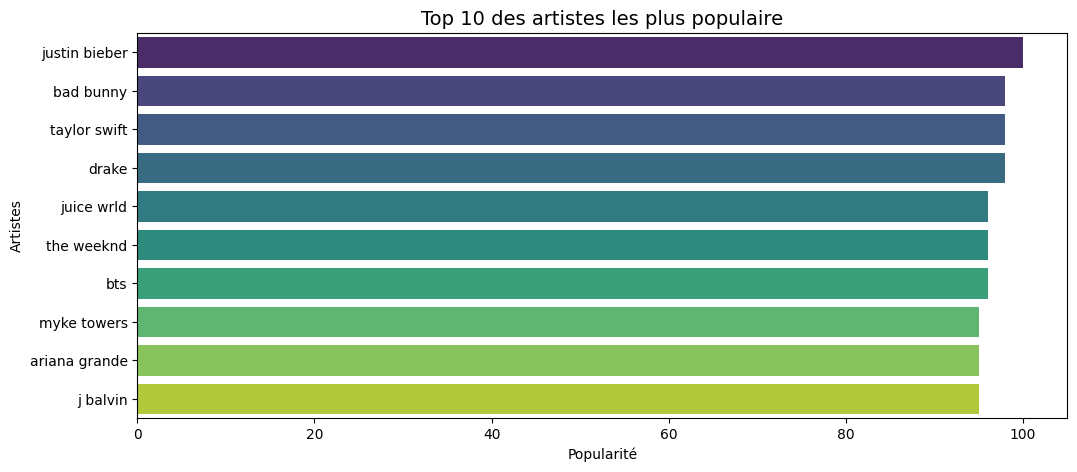

In [27]:
# Top 10 artistes les plus populaires
top_popular=df_artists.nlargest(10, "popularity")[["artists", "followers", "popularity"]]


plt.figure(figsize=(12, 5))
sns.barplot(x=top_popular["popularity"], y=top_popular["artists"], palette="viridis")
plt.title("Top 10 des artistes les plus populaire", fontsize=14)
plt.xlabel("Popularité")
plt.ylabel("Artistes")
plt.show()


- Nous voyons que Justin Bieber est en tête des artistes les plus populaires, mais Ed Sheeran domine en termes de followers, cela montre que l'engagement des fans ne garantit pas forcément la première place en terme de popularité.

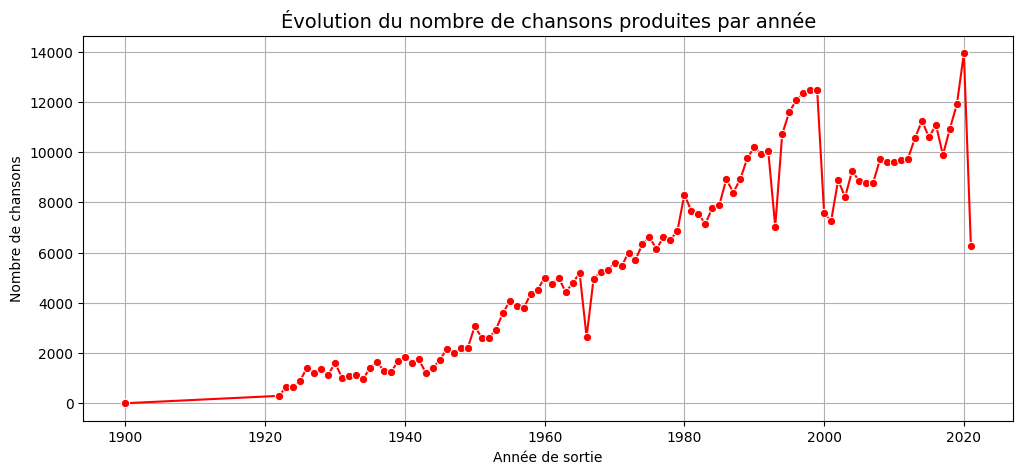

In [28]:
# Nombre de chansons par année
df_year=df_track.groupby("release_year")["id"].count().reset_index()
df_year.columns=["release_year", "nb_songs"]

plt.figure(figsize=(12, 5))
sns.lineplot(data=df_year, x="release_year", y="nb_songs", marker="o", color="red")
plt.title("Évolution du nombre de chansons produites par année", fontsize=14)
plt.xlabel("Année de sortie")
plt.ylabel("Nombre de chansons")
plt.grid(True)
plt.show()


- Nous observons une forte croissance de la production musicale vers 1950, nous observons des chutes une grande chute dans les années 90 qui pourrait s'expliquer par l'arrivée du numerique qui se repercute aussi en 2000, une derniere chute qui est sur la periode Covid19 qui a ralenti la production musicale.

/tmp/ipykernel_174560/3433814660.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_songs["popularity"], y=top_songs["title_artist"], palette="viridis")


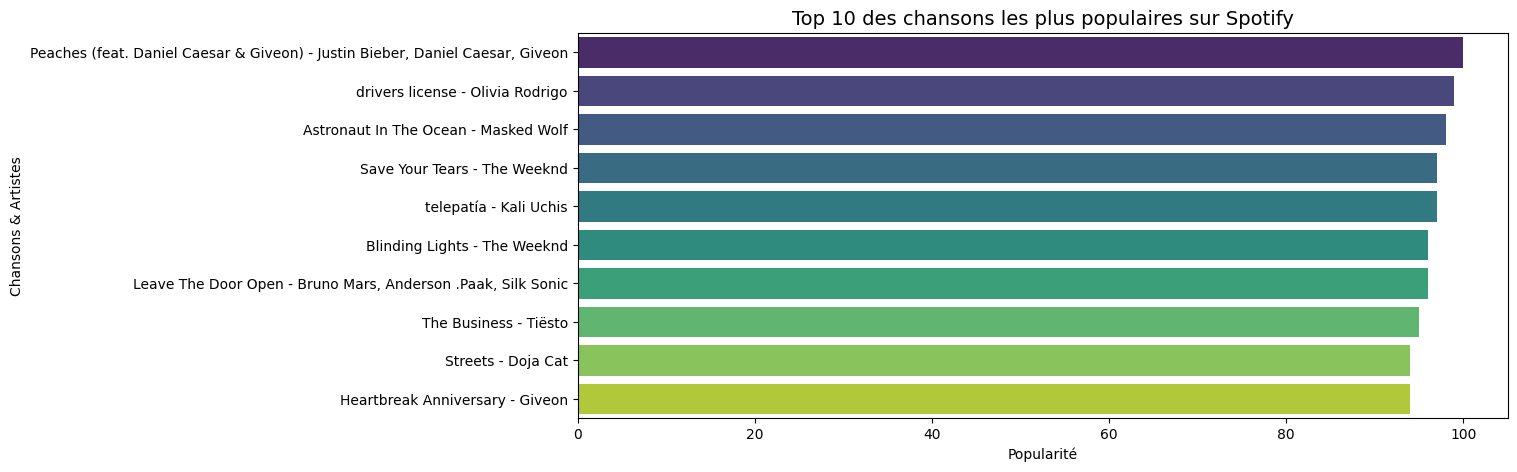

In [29]:
# 🔹 Top 10 des chansons les plus populaires
top_songs=df_track.nlargest(10, "popularity")
top_songs["title_artist"]=top_songs["name"] + " - " + top_songs["artists"]
plt.figure(figsize=(12, 5))
sns.barplot(x=top_songs["popularity"], y=top_songs["title_artist"], palette="viridis")
plt.title("Top 10 des chansons les plus populaires sur Spotify", fontsize=14)
plt.xlabel("Popularité")
plt.ylabel("Chansons & Artistes")
plt.show()

- On voit que les chansons les plus populaires sont surtout de la pop et du R&B, avec pas mal de featurings et un mélange entre des superstars (The Weeknd, Bruno Mars) et des nouveaux talents (Olivia Rodrigo, Masked Wolf), ce qui montre bien comment le streaming met en avant à la fois les artistes confirmés et les révélations. 

In [30]:
def plot_correlation(df, title="Matrice de corrélation"):
    df_corr=df.select_dtypes(include=["number"]).corr()
    plt.figure(figsize=(12,8))
    sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(title,fontsize=14)
    plt.show()

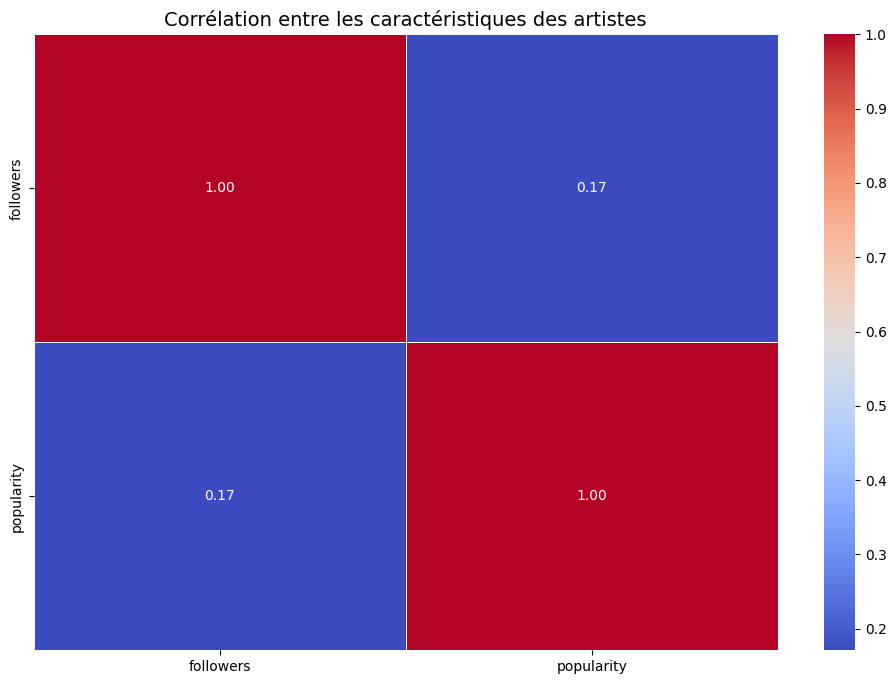

In [31]:
plot_correlation(df_artists, title="Corrélation entre les caractéristiques des artistes")

- On observe que la corrélatiion entre le nombre de followers et la popularité est super faible  (0.17), ainsi on observe qu'avoir plein d'abonnés ne garanti pas d'être super écouté sur spotify.

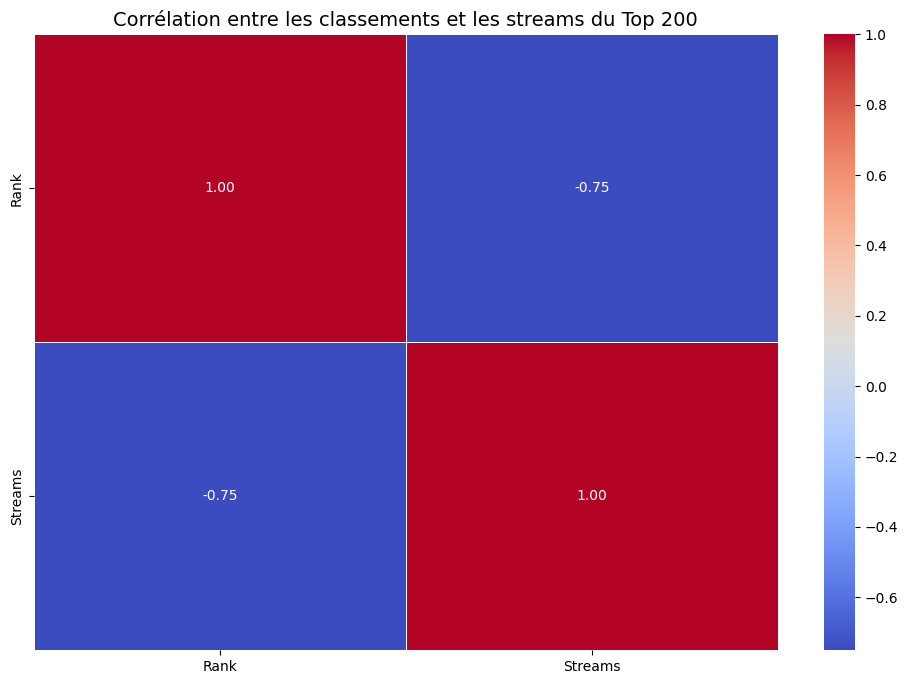

In [32]:
plot_correlation(df_top200, title="Corrélation entre les classements et les streams du Top 200")

- Nous observons que la corrélation négative forte (0.75) montre que plus une chanson a de streams, plus elle est bien classée dans le Top 200.

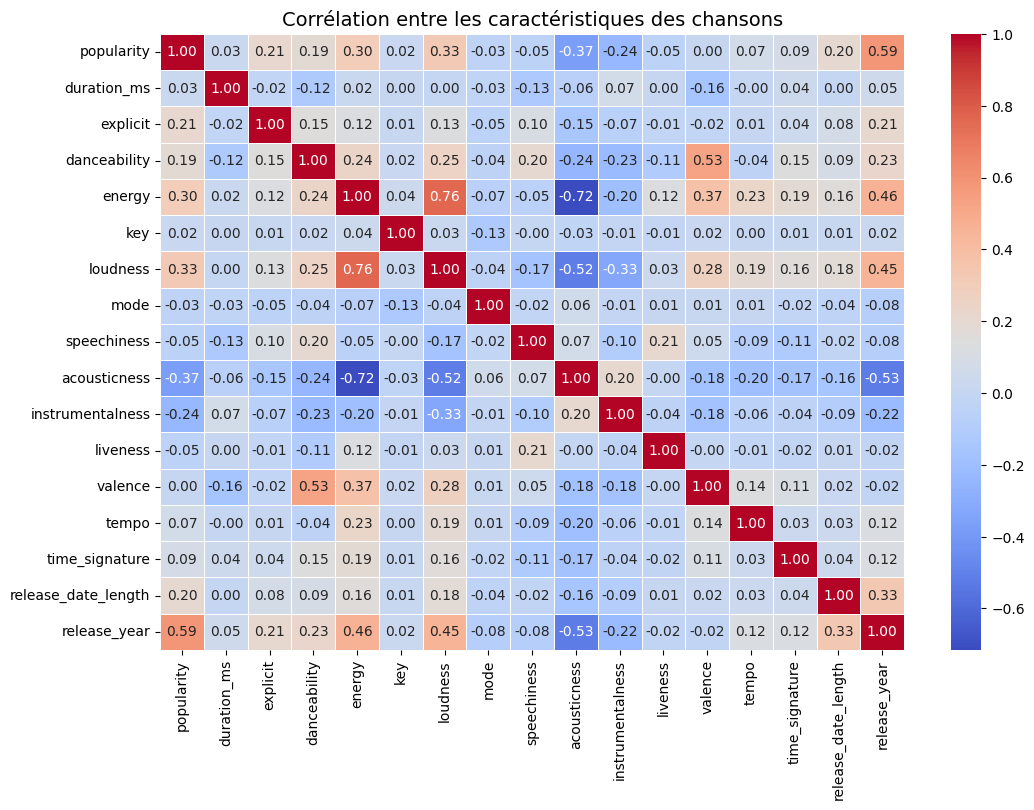

In [33]:
plot_correlation(df_track, title="Corrélation entre les caractéristiques des chansons")

- Les chansons récentes sont plus populaires (+0.59).
- Loudness et énergie sont fortement corrélées (+0.76).
- Instrumentalnes et popularité (-0.24).

## FONCTION POUR STREAMLIT

In [34]:
def rechercher_nom(nom):
    
    if not isinstance(nom, str) or not nom:
        return "Erreur ! Veuillez entrer un nom valide."

    # Recherche du nombre de followers
    artiste = df_artists[df_artists['artists'].str.lower() == nom.lower()]
    nb_abos = artiste['followers'].values[0] if not artiste.empty else "Non trouvé"

    # Recherche des chansons populaires et récentes
    morceaux = df_track[df_track['artists'].str.contains(nom, case=False, na=False)]
    pop = morceaux.nlargest(3, 'popularity')[['name', 'popularity']] if not morceaux.empty else "Aucune chanson trouvée"
    recence = morceaux.nlargest(3, 'release_year')[['name', 'release_year']] if not morceaux.empty else "Aucune chanson trouvée"

    # Recherche du nombre de chansons dans le top 200 global de 2020
    artiste_data = singleparartiste[singleparartiste['Artist'].str.lower() == nom.lower()]
    nb_chansons = artiste_data["Nombre de single dans le top200"].values[0] if not artiste_data.empty else "Non trouvé"

    # Affichage amélioré
    print(f"\nArtiste : {nom.capitalize()}")
    print(f"Nombre de followers : {nb_abos}")
    
    print("\nChansons les plus populaires :")
    if isinstance(pop, pd.DataFrame):
        print(pop.to_string(index=False))
    else:
        print(pop)
    
    print("\nChansons les plus récentes :")
    if isinstance(recence, pd.DataFrame):
        print(recence.to_string(index=False))
    else:
        print(recence)
    
    print(f"\nNombre de chansons dans le Top 200 Global 2020 : {nb_chansons}\n")

# Test avec Drake
rechercher_nom("Drake")



Artiste : Drake
Nombre de followers : 54416812.0

Chansons les plus populaires :
                                name  popularity
                         What’s Next          91
    Wants and Needs (feat. Lil Baby)          89
Laugh Now Cry Later (feat. Lil Durk)          88

Chansons les plus récentes :
                                    name  release_year
                             What’s Next          2021
        Wants and Needs (feat. Lil Baby)          2021
Lemon Pepper Freestyle (feat. Rick Ross)          2021

Nombre de chansons dans le Top 200 Global 2020 : 16



In [35]:
def recherche_titre(titre):
    
    if not isinstance(titre, str) or not titre:
        return "Erreur ! Veuillez entrer un titre valide."
    
    # Recherche des chansons correspondantes
    titres_trouves = df_track[df_track['name'].str.contains(titre, case=False, na=False)]
    if titres_trouves.empty:
        return "Aucun résultat correspondant à la chanson entrée."
    
    # Tri par popularité décroissante et sélection des 20 premiers résultats
    titres_trouves = titres_trouves.sort_values(by='popularity', ascending=False).head(20)
    
    # Affichage amélioré
    print(f"\nRésultats pour : {titre.capitalize()}")
    if not titres_trouves.empty:
        print(titres_trouves[['name', 'artists', 'popularity']].to_string(index=False))
    else:
        print("Aucun résultat trouvé.")

# Test avec une chanson
recherche_titre("Blinding Lights")



Résultats pour : Blinding lights
                                          name             artists  popularity
                               Blinding Lights          The Weeknd          96
        Blinding Lights (with ROSALÍA) - Remix The Weeknd, ROSALÍA          70
                       City Of Blinding Lights                  U2          60
                          Blinding Lights 2020              Alfons          54
                       City Of Blinding Lights                  U2          48
Blinding Lights (Cardio + Running Workout Mix)      Workout Music           19
